This notebook is based on ["Similarity Search for Efficient Active Learning and Search of Rare Concepts"](https://arxiv.org/abs/2007.00077)

# Prerequisites

1. Clone repo: `git clone git@github.com:CoactiveAI/mldataperf-demo.git`
2. Move into repo: `cd mldataperf-demo`
3. Install dependencies: `pip install -e .`
4. [Install faiss](https://github.com/facebookresearch/faiss/blob/master/INSTALL.md)
5. [Download embeddings](https://drive.google.com/file/d/1HLEI7OWDGfP-__w6vlnZjgOCo5fshP-7/view?usp=sharing) (~18 GB)
6. Unpack embeddings: `tar -xvf data.tar.gz`

# Demo

In [2]:
import numpy as np

from dataperf import active as demo

In [3]:
metadata_dir='data/saved_metadata/'
train_dir='data/saved_embeddings/train/'
test_dir='data/saved_embeddings/test/'

# Create training dataset object
if 'd_train' not in locals():
    d_train = demo.create_dataset(metadata_dir, train_dir, 'train')
print("Shape of embeddings for training images: {}".format(d_train.embeddings.shape))

# Do the same for the test set
if 'd_test' not in locals():
    d_test = demo.create_dataset(metadata_dir, test_dir, 'test')
print("Shape of embeddings for test images: {}".format(d_test.embeddings.shape))

# Create IndexWrapper for training data
if 'index_train' not in locals():
    index_train = demo.create_index(d_train)

# Set rare concept (e.g. Bowling, Sushi, Rat, Beach, Hawk, Cupcake, Crowd, etc)
concept = 'Bowling'

# Set concept
d_train.target_class = concept
d_test.target_class = concept

Loading metadata... Done.


Loading embeddings:   0%|          | 0/94 [00:00<?, ?partition/s]

Shape of embeddings for training images: (8121242, 256)
Loading metadata... Done.


Loading embeddings:   0%|          | 0/16 [00:00<?, ?partition/s]

Shape of embeddings for test images: (113508, 256)


In [7]:
'''
First you will see 5 examples of the concept (e.g., Bowling).
Then press any key to start active learning.

During active learning:
1 -> yes, the concept is in the image
0 -> no, the concept is not in the image
'''
np.random.seed(400)
model, scores = demo.seals(train=d_train,
                           test=d_test,
                           knn=index_train,
                           concept=concept,
                           npos=5, nneg=300,
                           rounds=[5, 5, 5, 5, 5])

Finished labeling 5 images


No handles with labels found to put in legend.


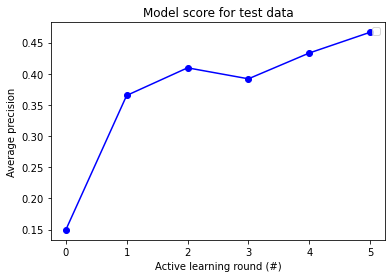

In [8]:
demo.visualize_scores(scores)